I.Introduction: 

The field of artificial neural networks is often just called neural networks or multi-layer perceptrons after perhaps the most useful type of neural network. A perceptron is a single neuron model that was a precursor to larger neural networks.

It is a field that investigates how simple models of biological brains can be used to solve difficult computational tasks like the predictive modeling tasks we see in machine learning. The goal is not to create realistic models of the brain but instead to develop robust algorithms and data structures that we can use to model difficult problems.

The power of neural networks comes from their ability to learn the representation in your training data and how best to relate it to the output variable you want to predict. In this sense, neural networks learn mapping. Mathematically, they are capable of learning any mapping function and have been proven to be a universal approximation algorithm.

The predictive capability of neural networks comes from the hierarchical or multi-layered structure of the networks. The data structure can pick out (learn to represent) features at different scales or resolutions and combine them into higher-order features, for example, from lines to collections of lines to shapes.



-------------------------------------------Multi-Layer Perceptron-------------------------------------------------------------- 



The Multilayer Perceptron was developed to tackle this limitation. It is a neural network where the mapping between inputs and output is non-linear.

A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. And while in the Perceptron the neuron must have an activation function that imposes a threshold, like ReLU or sigmoid, neurons in a Multilayer Perceptron can use any arbitrary activation function.


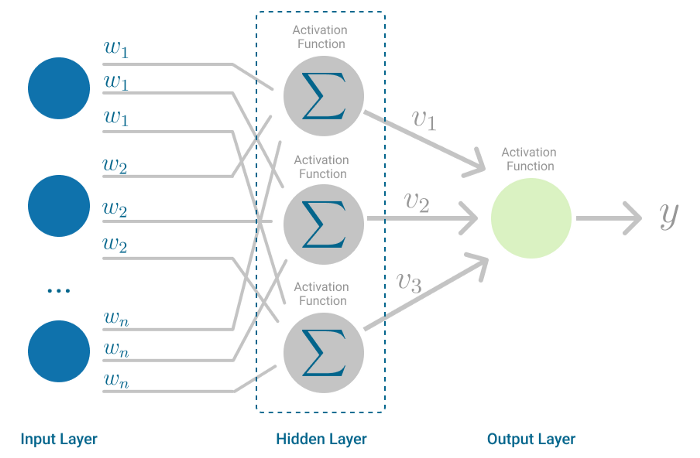


Multilayer Perceptron falls under the category of feedforward algorithms, because inputs are combined with the initial weights in a weighted sum and subjected to the activation function, just like in the Perceptron. But the difference is that each linear combination is propagated to the next layer.

Each layer is feeding the next one with the result of their computation, their internal representation of the data. This goes all the way through the hidden layers to the output layer.



If the algorithm only computed the weighted sums in each neuron, propagated results to the output layer, and stopped there, it wouldn’t be able to learn the weights that minimize the cost function. If the algorithm only computed one iteration, there would be no actual learning.

This is where Backpropagation comes into play.

Backpropagation
Backpropagation is the learning mechanism that allows the Multilayer Perceptron to iteratively adjust the weights in the network, with the goal of minimizing the cost function.

There is one hard requirement for backpropagation to work properly. The function that combines inputs and weights in a neuron, for instance the weighted sum, and the threshold function, for instance ReLU, must be differentiable. These functions must have a bounded derivative, because Gradient Descent is typically the optimization function used in MultiLayer Perceptron.

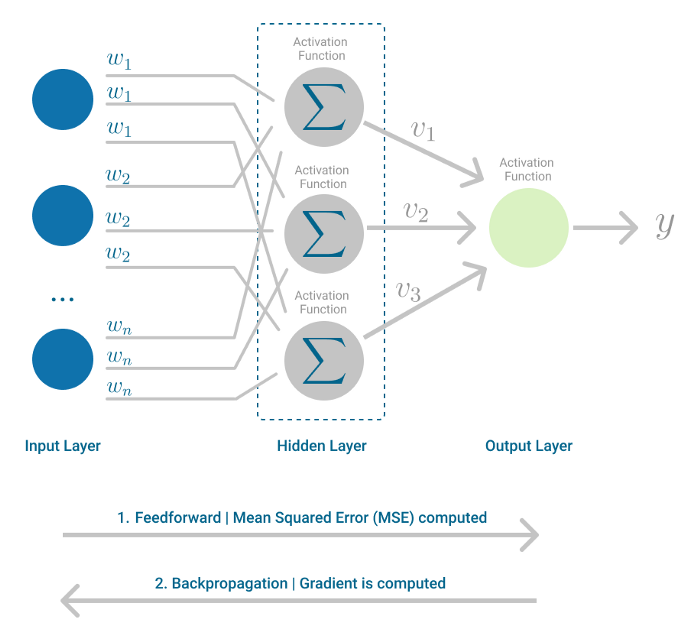


In each iteration, after the weighted sums are forwarded through all layers, the gradient of the Mean Squared Error is computed across all input and output pairs. Then, to propagate it back, the weights of the first hidden layer are updated with the value of the gradient. That’s how the weights are propagated back to the starting point of the neural network!

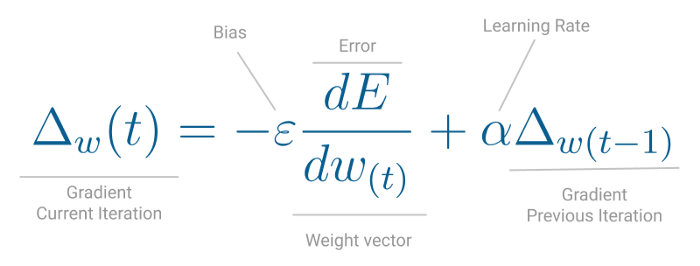

This process keeps going until gradient for each input-output pair has converged, meaning the newly computed gradient hasn’t changed more than a specified convergence threshold, compared to the previous iteration.

 

II. APPLICATION : 


1. Goal: 


The goal of this notebook is to show how MLP works to classify handwritten digits. 


2. Dataset Description: 

The used dataset is the digits dataset (datasets.load_digits()). The digits dataset consists of 8x8 pixel images of digits. The "images" attribute of the dataset stores 8x8 arrays of grayscale values for each image. The "target" attribute of the dataset stores the digit each image represents.


3. Importing necessary Libararies: 


In the following we will be using: 


* sklearn: 

Scikit-learn is one of the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.


In the actual case, we are using metrics from sklearn to evaluate the training and validation of our model.




* pandas:

Pandas makes it simple to do many of the time consuming, repetitive tasks associated with working with data, including:

- Data cleansing
- Data fill
- Data normalization
- Merges and joins
- Data visualization
- Statistical analysis
- Data inspection
- Loading and saving data


and much more ...



* matplotlib 

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.


* seaborn: 


Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.



* tensorflow: 


TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. You can look at the references section to have more resources on how and what tools you need to get started with tensorflow. 













In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import sklearn.metrics as metrics
matplotlib.rcParams['figure.figsize'] = [9, 6]

4. Importing the dataset: 



In [ ]:
#loadig the MNIST dataset using the tensorflow_datasets.load function which takes 14 arguments: 
"""
tfds.load(
    name: str,
    *,
    split: Optional[Tree[splits_lib.SplitArg]] = None,
    data_dir: Union[None, str, os.PathLike] = None,
    batch_size: tfds.typing.Dim = None,
    shuffle_files: bool = False,
    download: bool = True,
    as_supervised: bool = False,
    decoders: Optional[TreeDict[decode.partial_decode.DecoderArg]] = None,
    read_config: Optional[tfds.ReadConfig] = None,
    with_info: bool = False,
    builder_kwargs: Optional[Dict[str, Any]] = None,
    download_and_prepare_kwargs: Optional[Dict[str, Any]] = None,
    as_dataset_kwargs: Optional[Dict[str, Any]] = None,
    try_gcs: bool = False
)


"""
train_data, val_data, test_data = tfds.load("mnist", 
                                            split=['train[10000:]', 'train[0:10000]', 'test'],
                                            batch_size=128, as_supervised=True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#EXERCISE: 
#From the above decsription of the arguments of the tensorflow load function, define the remaining parameters and set their values 

5. Features Engineering: 



The goal of this step is simplifying and speeding up data transformations while also enhancing model accuracy.


There are many steps that can be taken into consideration:


- Feature Creation: Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features. 


- Transformations: Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.


- Feature Extraction: Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.



- Exploratory Data Analysis : Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.
Benchmark : A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own.


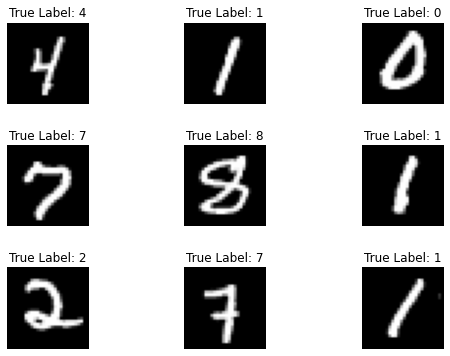

In [ ]:
#Specification of a variable "x_Visulaization" and "y_Visualization" 
x_Visualization, y_Visualization = tfds.load("mnist", split=['train[:1500]'], batch_size=-1, as_supervised=True)[0]
# the "tf.squeeze" function is a prebuild function in tensorflow that removes dimensions of size 1 from the shape of a tensor.
x_Visualization = tf.squeeze(x_Visualization, axis=3)

#Plotting the tensor 
for i in range(9):
    plt.subplot(3,3,1+i)
    plt.axis('off')
    plt.imshow(x_Visualization[i], cmap='gray')
    plt.title(f"True Label: {y_Visualization[i]}")
    #To adjust the subplot layout parameters (the specific parameter hspace: The height of the padding between subplots, as a fraction of the average Axes height.)
    plt.subplots_adjust(hspace=.5)

In [ ]:
#EXERCISE: 
#Using the same tensors (x_Visualization and y_Visualization) display 10 different versions of the number 3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


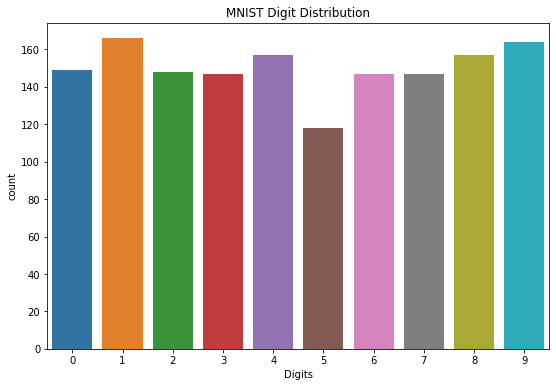

In [ ]:
#Counting the occurence of a digit in the dataset. 
sns.countplot(y_Visualization.numpy());
plt.xlabel('Digits')
plt.title("MNIST Digit Distribution");

In [ ]:
#The defined function below (preprocess) returns the reshaped tensor (that have the same type, in the same order) to the specified shape : [-1, 784]
def preprocess(x, y):
  # Reshaping the data using reshape function from tensorflow: 
  x = tf.reshape(x, shape=[-1, 784])
  # Rescaling the data
  x = x/255
  return x, y
#Applying the "preprocess" to the train_data and val_data
train_data, val_data = train_data.map(preprocess), val_data.map(preprocess)

6. Building the model: 



The following points should be kept in mind when designing the layers:

- The sequential model lets us build models layer by layer as needed in a multilayer perceptron, but it only works for stacks of layers with one input and one output.


- ‘Flatten’ flattens the input without changing the size of the batch. For example, if the shape of the inputs is (batch size) but there is no feature axis, flattening adds a new channel dimension, and the shape of the output will be (batch size, 1).


- The activation function is used in the activation step. There are many activation functions that can be used as mentioned above. If you need more resources to get on how to choose an activation function, please see the references section.


The first two dense layers are hidden and are used to make a fully connected model.


- The output layer - the last dense layer - has 10 neurons that decide which category the image belongs to.




6.1. Activation function: 


Here we are choosing one of two functions: ReLu and Softmax function. 

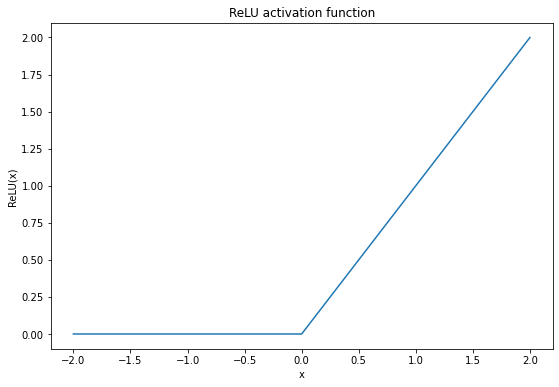

In [ ]:
#linspace generates evenly-spaced values in an interval along a given axis.
#-2 being the start in the range, 2 the final in the range and 201 the number of values to generate
x = tf.linspace(-2, 2, 201)
#Changing the type of the generated values to float32
x = tf.cast(x, tf.float32)
#Applying ReLu activation function on the generated values 
plt.plot(x, tf.nn.relu(x));
#Display the ReLu function 
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function');

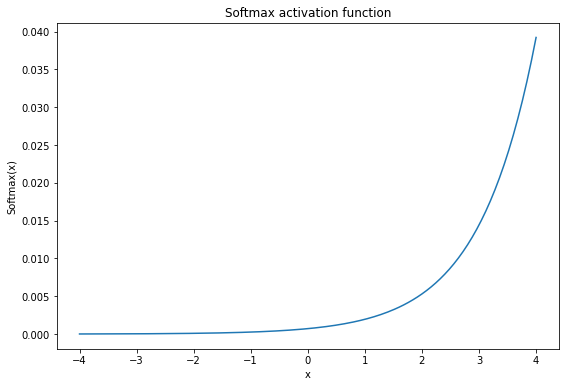

In [ ]:
#linspace generates evenly-spaced values in an interval along a given axis.
#-4 being the start in the range, 4 the final in the range and 201 the number of values to generate
x = tf.linspace(-4, 4, 201)
#Casting the type of the generated values to float32
x = tf.cast(x, tf.float32)
#Applying the softmax function 
plt.plot(x, tf.nn.softmax(x, axis=0));
#Displaying the function : 
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.title('Softmax activation function');

In [ ]:
#EXERCISE: 
#Using the list of activation function from the link: https://www.tensorflow.org/api_docs/python/tf/keras/activations

# 1. Using the same number of genertaed values (201) apply the ELU and SIGMOID functions. 

# 2. Display the two functions as previously done with RELU and SoftMax functions. 

In [ ]:
def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

6.2. Building the model: 

In [ ]:
#Defining the Dense Layer class : 
"""
The dense layer is the regular deeply connected neural network layer. 
Dense layer does the below operation on the input and return the output.

**
output = activation(dot(input, kernel) + bias)
**

Where: 

- input represent the input data

- kernel represent the weight data

- dot represent numpy dot product of all input and its corresponding weights

- bias represent a biased value used in machine learning to optimize the model

- activation represent the activation function.

"""
class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]
      # Initialize the weights and biases using Xavier scheme
      self.w = tf.Variable(xavier_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

In [ ]:
#Building the MLP class: 
class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers
   
  @tf.function
  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return x

In [ ]:
#Defining each layer of our MLP model : 
#Two hidden layers , the first of size 700 , the second of size 500
hidden_layer_1_size = 700
hidden_layer_2_size = 500
#Defining the output layer of size 10
output_size = 10

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

In [ ]:
#EXERCISE: 
#1. Using the same size of hidden layers, apply in three different version of the code block above : 
"""
1.1. The Sigmoid function 
1.2. The Softmax function 
1.3. The Elu function 

"""
#2. Now change the size of both layers to 900 for the first and 700 for the second and then apply chnages as in (1). 

7. Evaluation metrics: 


7.1. Loss function: A loss function is a function that compares the target and predicted output values; measures how well the neural network models the training data. When training, we aim to minimize this loss between the predicted and target outputs.




In the case of classification Loss Functions : given an input, the neural network produces a vector of probabilities of the input belonging to various pre-set categories — can then select the category with the highest probability of belonging; Ex. Binary Cross-Entropy, Categorical Cross-Entropy. 


Please check the references section for more information.

In [ ]:
def cross_entropy_loss(y_pred, y):
  # Compute cross entropy loss with a sparse operation
  sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(sparse_ce)

def accuracy(y_pred, y):
  # Compute accuracy after extracting class predictions
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)
  is_equal = tf.equal(y, class_preds)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

In [ ]:
#EXERCISE: 
#In the code block, we computed the sparse softmax cross entropy between logits and labels. 
#In the following, write a code that defines the same function 'cross_entropy_loss' but using 'weighted_cross_entropy_with_logits' unstead of 'sparse_softmax_cross_entropy_with_logits'. 


7.2. Hyperparameters optimizer: 


There are many built-in optimizers that can be used from tensorflow and that are defined by following classes: 



- class Adadelta: Optimizer that implements the Adadelta algorithm.


- class Adagrad: Optimizer that implements the Adagrad algorithm.


- class Adam: Optimizer that implements the Adam algorithm.


- class Adamax: Optimizer that implements the Adamax algorithm.


- class Ftrl: Optimizer that implements the FTRL algorithm.


- class Nadam: Optimizer that implements the Nadam algorithm.


- class Optimizer: Abstract optimizer base class.


- class RMSprop: Optimizer that implements the RMSprop algorithm.


- class SGD: Gradient descent (with momentum) optimizer.


We are using Adam optimization that is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [ ]:
class Adam:

  def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, ep=1e-7):
      # Initialize optimizer parameters and variable slots
      self.beta_1 = beta_1
      self.beta_2 = beta_2
      self.learning_rate = learning_rate
      self.ep = ep
      self.t = 1.
      self.v_dvar, self.s_dvar = [], []
      self.built = False
 
  def apply_gradients(self, grads, vars):
      # Initialize variables on the first call
      if not self.built:
        for var in vars:
          v = tf.Variable(tf.zeros(shape=var.shape))
          s = tf.Variable(tf.zeros(shape=var.shape))
          self.v_dvar.append(v)
          self.s_dvar.append(s)
        self.built = True
      # Update the model variables given their gradients
      for i, (d_var, var) in enumerate(zip(grads, vars)):
        self.v_dvar[i].assign(self.beta_1*self.v_dvar[i] + (1-self.beta_1)*d_var)
        self.s_dvar[i].assign(self.beta_2*self.s_dvar[i] + (1-self.beta_2)*tf.square(d_var))
        v_dvar_bc = self.v_dvar[i]/(1-(self.beta_1**self.t))
        s_dvar_bc = self.s_dvar[i]/(1-(self.beta_2**self.t))
        var.assign_sub(self.learning_rate*(v_dvar_bc/(tf.sqrt(s_dvar_bc) + self.ep)))
      self.t += 1.
      return 

In [ ]:
#EXERCISE: 
#After running the notebook, use the SGD and the adamax optimizers separatly
"""
SGD optimizer: 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD 


Adamax optimizer: 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adamax


"""
#What is your conclusion ? 

8. Training the model : 

In [ ]:
def train_step(x_batch, y_batch, loss, acc, model, optimizer):
  # Update the model state given a batch of data
  with tf.GradientTape() as tape:
    y_pred = model(x_batch)
    batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  grads = tape.gradient(batch_loss, model.variables)
  optimizer.apply_gradients(grads, model.variables)
  return batch_loss, batch_acc

def val_step(x_batch, y_batch, loss, acc, model):
  # Evaluate the model on given a batch of validation data
  y_pred = model(x_batch)
  batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  return batch_loss, batch_acc
  
def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
  # Initialize data structures
  train_losses, train_accs = [], []
  val_losses, val_accs = [], []

  # Format training loop and begin training
  for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_val, batch_accs_val = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_data:
      # Compute gradients and update the model's parameters
      batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
      # Keep track of batch-level training performance
      batch_losses_train.append(batch_loss)
      batch_accs_train.append(batch_acc)

    # Iterate over the validation data
    for x_batch, y_batch in val_data:
      batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
      batch_losses_val.append(batch_loss)
      batch_accs_val.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    val_loss, val_acc = tf.reduce_mean(batch_losses_val), tf.reduce_mean(batch_accs_val)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch: {epoch}")
    print(f"Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")
    print(f"Validation loss: {val_loss:.3f}, Validation accuracy: {val_acc:.3f}")
  return train_losses, train_accs, val_losses, val_accs

In [ ]:
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, train_data, val_data, 
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=10)

Epoch: 2
Training loss: 0.047, Training accuracy: 0.985
Validation loss: 0.089, Validation accuracy: 0.976
Epoch: 3
Training loss: 0.033, Training accuracy: 0.989
Validation loss: 0.103, Validation accuracy: 0.973
Epoch: 4
Training loss: 0.029, Training accuracy: 0.990
Validation loss: 0.112, Validation accuracy: 0.971
Epoch: 5
Training loss: 0.023, Training accuracy: 0.993
Validation loss: 0.091, Validation accuracy: 0.978
Epoch: 6
Training loss: 0.018, Training accuracy: 0.994
Validation loss: 0.116, Validation accuracy: 0.973
Epoch: 7
Training loss: 0.013, Training accuracy: 0.995
Validation loss: 0.097, Validation accuracy: 0.980
Epoch: 8
Training loss: 0.013, Training accuracy: 0.996
Validation loss: 0.101, Validation accuracy: 0.979
Epoch: 9
Training loss: 0.011, Training accuracy: 0.996
Validation loss: 0.100, Validation accuracy: 0.980


In [ ]:
#EXERCISE: 
#Retrain the model with the new changes that you made on the loss and optimizer 

9. Displaying the metrics 

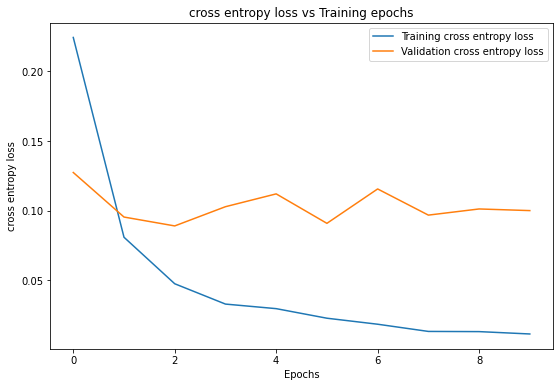

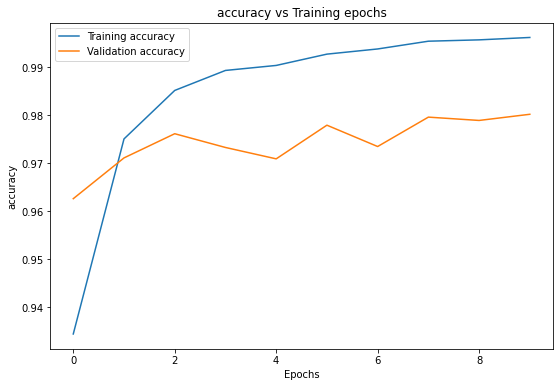

In [ ]:
def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
  plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
  plt.xlabel("Epochs")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} vs Training epochs");

plot_metrics(train_losses, val_losses, "cross entropy loss")
plot_metrics(train_accs, val_accs, "accuracy")